In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt
from datetime import timedelta

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect,func

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# Reflect an existing database into a new model
Base = automap_base()
# Reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

### Design a query to retrieve the last 12 months of precipitation data and plot the results

#### Calculate the date 1 year ago from the last data point in the database

In [10]:
last_day = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_day

('2017-08-23')

In [11]:
one_yr_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
one_yr_ago

datetime.date(2016, 8, 23)

#### Perform a query to retrieve the data and precipitation scores

In [12]:
results = session.query(Measurement.date,Measurement.prcp)\
.filter(Measurement.date <= dt.date(2017, 8, 23),Measurement.date >= dt.date(2016, 8, 23))\
.all()

#### Save the query results as a Pandas DataFrame and set the index to the date column

In [13]:
date = [result[0] for result in results]
prcp = [result[1]for result in results]

In [14]:
df = pd.DataFrame({"Date" : date, "precipitation" : prcp})
df = df.set_index('Date')
df.head()

,precipitation
Date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


#### Sort the dataframe by date

In [15]:
result_df = df.sort_values('Date',ascending=True)
result_df.head()

,precipitation
Date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


#### Use Pandas Plotting with Matplotlib to plot the data

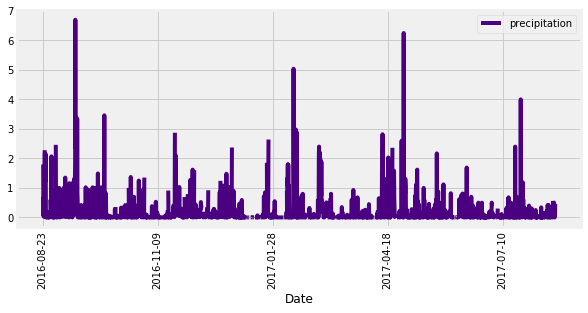

In [16]:
result_df.plot(figsize=(9,4),rot = 90, color = "indigo")

In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data
result_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


### Station Analysis

#### Design a query to show how many stations are available in this dataset?

In [18]:
station_count = session.query(Station.station).group_by(Station.station).count()
print(f"The total stations are {station_count}.")

The total stations are 9.


#### What are the most active stations? (i.e. what stations have the most rows)?
#### List the stations and the counts in descending order.

In [19]:
most_active = session.query(Measurement.station, func.count(Measurement.date))\
.group_by(Measurement.station)\
.order_by(func.count(Measurement.date).desc())\
.first()
most_active

('USC00519281', 2772)

In [20]:
station_ranking = session.query(Measurement.station, func.count(Measurement.date))\
.group_by(Measurement.station)\
.order_by(func.count(Measurement.date).desc())\
.all()
station_ranking

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

#### Using the station id from the previous query, calculate the lowest temperature recorded, highest temperature recorded, and average temperature of the most active station?

In [21]:
lowest_temp = session.query(Measurement.station, func.min(Measurement.tobs))\
.group_by(Measurement.station)\
.filter(Measurement.station == 'USC00519281')\
.all()
lowest_temp 

[('USC00519281', 54.0)]

In [22]:
highest_temp = session.query(Measurement.station, func.max(Measurement.tobs))\
.group_by(Measurement.station)\
.filter(Measurement.station == 'USC00519281')\
.all()
highest_temp

[('USC00519281', 85.0)]

In [23]:
avg_temp = session.query(Measurement.station, func.avg(Measurement.tobs))\
.group_by(Measurement.station)\
.filter(Measurement.station == 'USC00519281')\
.all()
avg_temp

[('USC00519281', 71.66378066378067)]

#### Choose the station with the highest number of temperature observations. Query the last 12 months of temperature observation data for this station and plot the results as a histogram

In [24]:
results_2 = session.query(Measurement.tobs, func.count(Measurement.tobs))\
.filter(Measurement.date <= dt.date(2017, 8, 23),Measurement.date >= dt.date(2016, 8, 23))\
.filter(Measurement.station == 'USC00519281')\
.group_by(Measurement.tobs)\
.all()

In [25]:
tobs = [result[0] for result in results_2]
freq = [result[1]for result in results_2]

In [26]:
df_tobs = pd.DataFrame({"Temperature" : tobs, "Frequency" : freq})
df_tobs.head()

,Temperature,Frequency
0,59.0,3
1,60.0,2
2,61.0,1
3,62.0,6
4,63.0,4


Text(0, 0.5, 'Frequency')

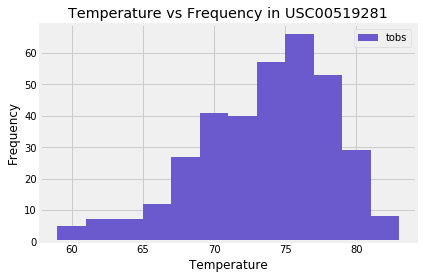

In [27]:
plt.hist(df_tobs.Temperature, weights=df_tobs.Frequency, bins=12,label = "tobs", color = "slateblue")
plt.legend(loc="upper right")
plt.title('Temperature vs Frequency in USC00519281')
plt.xlabel('Temperature')
plt.ylabel('Frequency')

## Bonus Challenge Assignment

### Temperature Analysis I

In [28]:
import matplotlib
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [29]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import datetime as dt
from datetime import timedelta

In [30]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [31]:
engine = create_engine("sqlite:///hawaii.sqlite", echo=False)

In [32]:
Base = automap_base()
Base.prepare(engine, reflect=True)
Measurement = Base.classes.measurement
Station = Base.classes.station

In [33]:
session = Session(engine)

In [34]:
# Average temperature in June
june_avg = session.query(func.avg(Measurement.tobs)).\
        filter(func.strftime("%m", Measurement.date) == "06").all()
june_avg

[(74.94411764705882)]

In [35]:
# Average temperature in December
dec_avg = session.query(func.avg(Measurement.tobs)).\
        filter(func.strftime("%m", Measurement.date) == "12").all()
dec_avg

[(71.04152933421226)]

#### Statistical Analysis: Using unpaired t test.

In [36]:
# Count how many data points in June
june_count = session.query(func.count(Measurement.tobs)).\
        filter(func.strftime("%m", Measurement.date) == "06").all()
june_count

[(1700)]

In [37]:
# Count how many data points in December
dec_count = session.query(func.count(Measurement.tobs)).\
        filter(func.strftime("%m", Measurement.date) == "12").all()
dec_count

[(1517)]

In [38]:
# Get June tobs data
population1 = session.query(Measurement.tobs).\
        filter(func.strftime("%m", Measurement.date) == "06").all()

In [39]:
population2 = session.query(Measurement.tobs).\
        filter(func.strftime("%m", Measurement.date) == "12").all()

In [40]:
# equal_var=False performs Welch's t-test which does not assume equal population variance
stats.ttest_ind(population1, population2, equal_var=False)

Ttest_indResult(statistic=array([31.35503692]), pvalue=array([4.19352984e-187]))

In [41]:
print("Tobs in June was significant difference from December (p< .05) from 2010 to 2017.")

Tobs in June was significant difference from December (p< .05) from 2010 to 2017.


### Temperature Analysis II

#### Use your previous function 'calc_temps' to calculate the tmin, tavg, and tmax for your trip using the previous year's data for those same dates.

In [42]:
# Use your previous function 'calc_temps' to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
print("I chose my holiday will be from 2018-07-01 to 2018-07-08.")

I chose my holiday will be from 2018-07-01 to 2018-07-08.


In [43]:
# This function called 'calc_temps' will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [44]:
# Use the function `calc_temps` to calculate the tmin, tavg, and tmax 
# for a previous year in the data set

prev_year_start = dt.date(2017, 7, 1)
prev_year_end = dt.date(2017, 7, 8)

tmin, tavg, tmax = calc_temps(prev_year_start.strftime("%Y-%m-%d"), prev_year_end.strftime("%Y-%m-%d"))[0]
print(tmin, tavg, tmax)

71.0 78.04347826086956 87.0


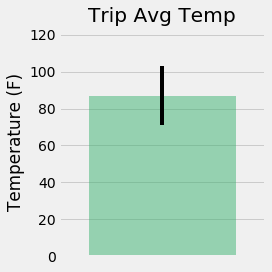

In [45]:
fig, ax = plt.subplots(figsize=plt.figaspect(1.))
xpos = 1
yerr = tmax-tmin

bar = ax.bar(xpos,tmax,yerr=yerr, alpha=0.5,color = "mediumseagreen",align='center')
ax.set_title('Trip Avg Temp')
ax.set(xticks=range(xpos), xticklabels="a", title="Trip Avg Temp", ylabel="Temperature (F)")
ax.margins(.2, .2)

fig.tight_layout()
plt.show()

## Daily Rainfall Average

### Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates. Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

In [46]:
# Read the tables and merge the table
csvfile = "hawaii_measurements.csv"
csvfile_2 = "hawaii_stations.csv"
m_df = pd.read_csv(csvfile)
s_df = pd.read_csv(csvfile_2)
merge_df = m_df.merge(s_df, how = "outer", on = "station")
merge_df.head(3)

,station,date,prcp,tobs,name,latitude,longitude,elevation
0,USC00519397,2010-01-01,0.08,65,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,USC00519397,2010-01-02,0.00,63,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
2,USC00519397,2010-01-03,0.00,74,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0


In [47]:
# Adjust date formate
merge_df['date'] = pd.to_datetime(merge_df['date'])
merge_df.head(3)

,station,date,prcp,tobs,name,latitude,longitude,elevation
0,USC00519397,2010-01-01,0.08,65,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,USC00519397,2010-01-02,0.00,63,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
2,USC00519397,2010-01-03,0.00,74,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0


In [48]:
# Set index
merge_df = merge_df.set_index(merge_df['date'])
merge_df.head(3)

,station,date,prcp,tobs,name,latitude,longitude,elevation
date,,,,,,,,
2010-01-01,USC00519397,2010-01-01,0.08,65,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
2010-01-02,USC00519397,2010-01-02,0.00,63,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
2010-01-03,USC00519397,2010-01-03,0.00,74,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0


In [49]:
# Select observations between two datetimes
vacation_df = merge_df.loc['2017-07-01':'2017-07-08']
vacation_df = vacation_df.sort_values(by = ['prcp'], ascending=False)
vacation_df

,station,date,prcp,tobs,name,latitude,longitude,elevation
date,,,,,,,,
2017-07-02,USC00516128,2017-07-02,0.50,78,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
2017-07-03,USC00516128,2017-07-03,0.40,77,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
2017-07-07,USC00516128,2017-07-07,0.30,74,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
2017-07-07,USC00519281,2017-07-07,0.18,75,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
2017-07-02,USC00519281,2017-07-02,0.15,81,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
2017-07-03,USC00519281,2017-07-03,0.15,76,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
2017-07-03,USC00513117,2017-07-03,0.13,77,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2017-07-01,USC00516128,2017-07-01,0.10,74,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
2017-07-04,USC00519281,2017-07-04,0.08,78,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9


## Calculate the daily normals for your trip push each tuple of calculations into a list called 'normals'

In [50]:
# Set the start and end date of the trip
start_date = '2017-07-01'
end_date = '2017-07-08'

In [51]:
# Use the start and end date to create a range of dates
vac_date = pd.date_range(start_date, end_date)
vac_date 

DatetimeIndex(['2017-07-01', '2017-07-02', '2017-07-03', '2017-07-04',
               '2017-07-05', '2017-07-06', '2017-07-07', '2017-07-08'],
              dtype='datetime64[ns]', freq='D')

In [52]:
# Strip off the year and save a list of %m-%d strings()
vac_date_2 = vac_date.strftime('%m-%d')
vac_date_2

Index(['07-01', '07-02', '07-03', '07-04', '07-05', '07-06', '07-07', '07-08'], dtype='object')

In [53]:
# Loop through the list of %m-%d strings and calculate the normals for each date
results =[]
def daily_normals(date):
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
for date in vac_date_2:
    results.append(daily_normals(date))   

In [54]:
# Transform a nested list to a list of tuple
numbers = []
for list in results:
    for number in list:
        numbers.append(number)
numbers

[(67.0, 74.77777777777777, 81.0),
 (68.0, 75.40384615384616, 82.0),
 (68.0, 75.32075471698113, 87.0),
 (70.0, 76.57142857142857, 81.0),
 (66.0, 75.0, 81.0),
 (69.0, 75.0, 81.0),
 (69.0, 74.91071428571429, 82.0),
 (69.0, 76.08333333333333, 83.0)]

In [55]:
# Transform a list od tuple into a dataframe
vac_df = pd.DataFrame(numbers, columns=["Minimum Temp", "Average Temp", "Maximum Temp"])
vac_df

,Minimum Temp,Average Temp,Maximum Temp
0,67.0,74.777778,81.0
1,68.0,75.403846,82.0
2,68.0,75.320755,87.0
3,70.0,76.571429,81.0
4,66.0,75.000000,81.0
5,69.0,75.000000,81.0
6,69.0,74.910714,82.0
7,69.0,76.083333,83.0


In [56]:
# Add date to dataframe
date = vac_date
vac_df["Date"] = date
vac_df

,Minimum Temp,Average Temp,Maximum Temp,Date
0,67.0,74.777778,81.0,2017-07-01
1,68.0,75.403846,82.0,2017-07-02
2,68.0,75.320755,87.0,2017-07-03
3,70.0,76.571429,81.0,2017-07-04
4,66.0,75.000000,81.0,2017-07-05
5,69.0,75.000000,81.0,2017-07-06
6,69.0,74.910714,82.0,2017-07-07
7,69.0,76.083333,83.0,2017-07-08


In [57]:
# Set date as index
vac_df = vac_df.set_index('Date')
vac_df

,Minimum Temp,Average Temp,Maximum Temp
Date,,,
2017-07-01,67.0,74.777778,81.0
2017-07-02,68.0,75.403846,82.0
2017-07-03,68.0,75.320755,87.0
2017-07-04,70.0,76.571429,81.0
2017-07-05,66.0,75.000000,81.0
2017-07-06,69.0,75.000000,81.0
2017-07-07,69.0,74.910714,82.0
2017-07-08,69.0,76.083333,83.0


Text(0, 0.5, 'Temperature (F)')

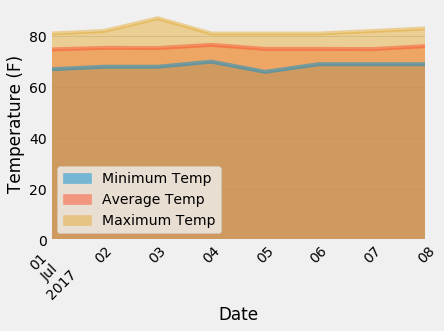

In [58]:
# Plot the daily normals as an area plot with 'stacked=False'
ax = vac_df.plot.area(stacked=False, rot = 45)
plt.ylabel("Temperature (F)")